Disk Scheduling Algorrithms are crucial in managing how data is read from and written to a computer's hard disk.

**KEY TERMS FOR THE DISK SCHEDULING ALGORITHMS:**

**Seek Time:** Time taken to locate the disk arm to a specified track where the data is to be read or written. Minimum average seek time is better.

**Rotational Latency:** Time taken by the desired sector of the disk to rotate in a position. The minimum latency is better

**Transfer Time:** The time to transfer the data. Depends on the rotating speed of the disk and the number of bytes to be transfered.

**Disk Access Time:**

*Disk Access Time = Seek Time + Rotational Latency + Transfer Time*

*Total Seek Time = Total head Movement * Seek Time*


**Disk Response Time:** Response time is the average time spent by a request waiting to perform its I/O operation. Average Response time is the response time of all resquests. Variance Responce time is the measure of how individual requests are serviced with respect to the average response time. Minimum variance response is better.


**FIRST COME FIRST SERVED:**

FCFS, the requests are addressed in the order they arrive in the disk queue.

Steps to implement:

-> Take the input as an arguement list of the funciton (List of requests and initial head position)

-> Initialize variables (Total head movement = 0, current position = initial head position)

-> Process each request in order (Calculate distance = abs(track - current position), add distance to total head movement, update current position to track)

-> Output(Total head movement)

In [50]:
def fcfs_disk_scheduling(rq, initial_head):
    total_head_movement = 0
    current_pos = initial_head

    for x in rq:
      distance = abs(x - current_pos)
      total_head_movement += distance
      current_pos = x

    return total_head_movement

Example Case:


In [51]:
requests = [98, 183, 37, 122, 14, 124, 65, 67]
initial_head = 53
print(f"total head movement: {fcfs_disk_scheduling(requests, initial_head)}")

total head movement: 640


**SHORTEST SEEK TIME FIRST:**
In SSTF, requests having the shortest seek time are executed first. So, the seek time of every request is calculated in advance in the queue and then they are scheduled according to their calculated seek time. As a result, the request near the disk arm will get executed first.

Steps to implement:

-> Take the input ( list of pending requests, and initial head position)

-> Initialize the total head movement = 0,
current head position and a list to track whether a request has been serviced or not, Do not modify the original list, make a copy!

-> Repeat until all requests are serviced (Find the unservised request with the minimum seek distance from the current head, add the distance to total head movement, move the head to that request and make the request as serviced.)

-> Output (the total head movement and the order of the requests were serviced.)

In [52]:
def sstf_disk_scheduling(rq, initial_head):
  total_head_movement = 0
  current_head = initial_head
  request_list = rq.copy()
  serviced = [False] * len(request_list)

  while not all(serviced):
    min_distance = float('inf')
    next_index = -1

    for i in range(len(request_list)):
      if not serviced[i]:
        distance = abs(request_list[i] - current_head)
        if distance < min_distance:
          min_distance = distance
          next_index = i

    serviced[next_index] = True
    total_head_movement += min_distance
    current_head = request_list[next_index]


  return total_head_movement

Example Case:

In [53]:
requests = [98, 183, 37, 122, 14, 124, 65, 67]
initial_head = 53
print(f"total head movement: {sstf_disk_scheduling(requests, initial_head)}")

total head movement: 236


**SCAN:**
In the SCAN algorithm the disk arm moves in a particular direction and services the requests coming in its path and after reaching the end of the disk, it reverses its direction and again services the request arriving in its path. Since it works as an elevator, it is also known as *elevator algortihm*

Steps to implement:

-> Take the input (requests list, initial head position, disk size(max track num), direction of movement)

-> Add end track (Zero or max - 1) depending on direction ( add 0 if moving left, add max track movement if moving right to simulate the head reaching the end before reversing)

-> Sort the requests list (with sort func)

-> Divide requests ( like left side of the head and the right side of the head)

-> Service in one direction (Move in the specified direction and service the requests, when you reach the end reverse the direction.)

-> Track head movement

In [54]:
def scan_disk_scheduling(rq, initial_head, disk_size, direction):
  request_list = rq.copy()
  request_list.append(0) if direction == "left" else requests.append(disk_size - 1)
  request_list.sort()

  total_head_movement = 0
  current_head = initial_head
  service_order = []

  left = [r for r in request_list if r < initial_head]
  right = [r for r in request_list if r >= initial_head]


  if direction == "left":
      for track in reversed(left):
          service_order.append(track)
          total_head_movement += abs(current_head - track)
          current_head = track
      for track in right:
          service_order.append(track)
          total_head_movement += abs(current_head - track)
          current_head = track
  elif direction == "right":
      for track in right:
          service_order.append(track)
          total_head_movement += abs(current_head - track)
          current_head = track
      for track in reversed(left):
          service_order.append(track)
          total_head_movement += abs(current_head - track)
          current_head = track


  return total_head_movement

Example Case:

In [55]:
requests = [98, 183, 37, 122, 14, 124, 65, 67]
initial_head = 53
print(f"total head movement: {scan_disk_scheduling(requests, initial_head, 200, 'left')}")

total head movement: 236



**CSCAN:**
In the SCAN algorithm, the disk arm scans the path that has been scanned, after reversing its direction. So, it may be possible that too many requests are waiting at the other end or there may be zero or few requests pending at the scanned area.

These problems are avoided in the CSCAN. The disk arm instead of reversing its direction goes to the other end of the disk and start servicing the requests from there in the same direction, like it is moving in circular fashion, that is why it is called Circular Scan(CSCAN)

Steps to implement: pretty much similar with SCAN algorithm.

-> Take the inputs(Disk request list, initial head position, disk size, direction)

-> Add End track points (Add zero and disk size - 1 to simulate)

->Sort the request list

-> Divide the requests based on the head position( right-> greater or equal to the head, left -> less than the head)

-> Service based on the direction (
  For right -> move right servicing all, just to the beginning and start from the head.
  for left -> do the same, but instead of jumping to the beginnign jump to the end.)

-> Track head movement.

In [47]:
def cscan_disk_scheduling(rq, initial_head, disk_size, direction):
  request_list = rq.copy()
  request_list.append(0)
  request_list.append(disk_size - 1)
  request_list.sort()

  total_head_movement = 0
  current_head = initial_head
  service_order = []

  left = [r for r in request_list if r < initial_head]
  right = [r for r in request_list if r >= initial_head]

  if direction == 'left':
    for track in reversed(left):
      service_order.append(track)
      total_head_movement += abs(track - current_head)
      current_head = track

    total_head_movement += abs(current_head - (disk_size - 1))
    current_head = disk_size - 1

    for track in right:
      service_order.append(track)
      total_head_movement += abs(current_head - track)
      current_head = track

  elif direction == 'right':
    for track in right:
      service_order.append(track)
      total_head_movement += abs(track - current_head)
      current_head = track

    total_head_movement += abs(current_head - 0)
    current_head = 0

    for track in left:
      service_order.append(track)
      total_head_movement += abs(current_head - track)
      current_head = track

  return total_head_movement


Example Case:

In [56]:
requests = [98, 183, 37, 122, 14, 124, 65, 67]
initial_head = 53
print(f"total head movement: {cscan_disk_scheduling(requests, initial_head, 200, 'left')}")

total head movement: 520


**Earliest Deadline First(EDF):**

Earliest deadline first (EDF) comes under the category of the dynamic scheduling algorithm. We can use it in real-time operating systems for scheduling tasks as well as processes with specific deadlines. It's a priority-based algorithm where we assign the highest priority to the tasks with the earliest deadline. Additionally, the CPU executes the scheduled tasks based on priority.

Steps to implement:

-> Take the inputs ( a list of requests with deadlines, and intial head position)

-> Sort the requests based on their deadline(Ascending order)

-> Initialize the total head movement = 0, track current to head posiiton, record service order.)

-> Process requests by deadline order (
  For each requests:
    calculate the distance of the track,
    move the head and accumulate movement, update cuurent head position)

-> Output of the service order based on deadlines and total head movement

In [57]:
def edf_disk_scheduling(rq_with_deadlines, initial_head):
  request_list = sorted(rq_with_deadlines, key = lambda x: x[1])
  total_head_movement = 0
  current_head = initial_head
  service_order = []

  for track, deadline in request_list:
    service_order.append((track, deadline))
    total_head_movement += abs(track - current_head)
    current_head = track

  return total_head_movement

Example Case

In [58]:
requests = [(82, 25), (170, 10), (43, 20), (140, 15), (24, 30), (16, 35), (190, 5)]
initial_head = 50
print(f'total head movement = {edf_disk_scheduling(requests, initial_head)}')

total head movement = 392


FEASIBLE DEADLINE SCAN(FD-SCAN):
A real time disk scheduling algorithm, FD-SCAN differs from SCAN in the way it dynamically adapts the scan direction towards the request wtih the earliest feasible deadline, where a deadline is said to be feasible if it is estimated that it can be met.

Steps to implement:
-> Take input (Requests with deadlines, head start position, direction of movement)

-> Estimate if requests are feasible (Calculate seek time needed to reach each request, only include requests where seek time <= deadline)

-> Group requests by direction (
  For right:
    include only requests at or beyond
  For left:
    include only request at or before

-> Sort feasible requests in ascending or descending order based on the direction.

-> Service the feasible requests (Move the head and update total movement, record order of service)

In [59]:
def fdscan_disk_scheduling(rq_with_deadlines, initial_head, direction):
  total_head_movement = 0
  current_head = initial_head
  time = 0
  service_order = []

  feasible_requests = []
  for track, deadline in rq_with_deadlines:
    seek_time = abs(track - current_head)
    if seek_time <= deadline:
      feasible_requests.append((track, deadline))

  if direction == 'right':
    dir_reqs = [r for r in feasible_requests if r[0] >= current_head]
    dir_reqs.sort(key = lambda x:x[0])

  else:
    dir_reqs = [r for r in feasible_requests if r[0] <= current_head]
    dir_reqs.sort(key=lambda x:x[0], reverse=True)

  for track, deadline in dir_reqs:
    time += abs(track - current_head)
    if time <= deadline:
      service_order.append((track, deadline))
      total_head_movement += abs(track - current_head)
      current_head = track


  return total_head_movement

Example Case:

In [60]:
requests = [(82, 25), (170, 10), (43, 20), (140, 15), (24, 30), (16, 35), (190, 5)]
initial_head = 50
print(f'total head movement = {fdscan_disk_scheduling(requests, initial_head, "left")}')

total head movement = 34


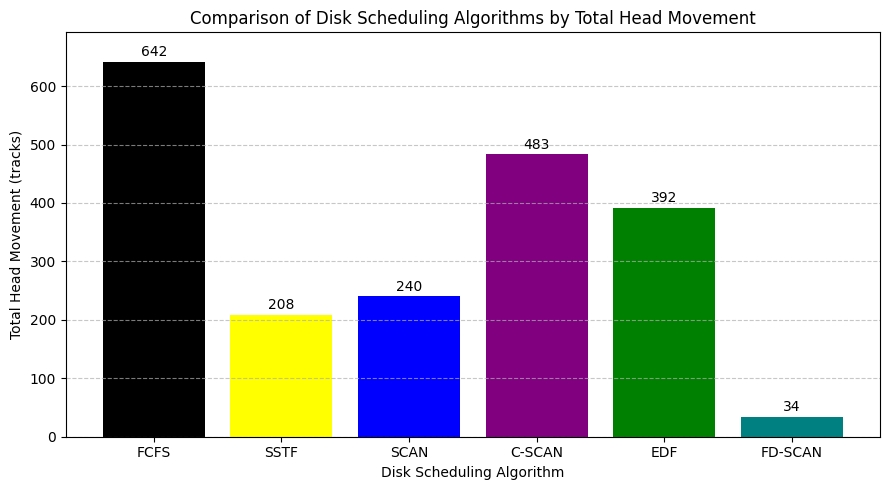

In [65]:

requests_with_deadlines = [(82, 25), (170, 10), (43, 20), (140, 15), (24, 30), (16, 35), (190, 5)]
requests = [82, 170, 43, 140, 24, 16, 190]
initial_head = 50
disk_size = 200
direction = 'left'

head_movements = {
    "FCFS": fcfs_disk_scheduling(requests, initial_head),
    "SSTF": sstf_disk_scheduling(requests, initial_head),
    "SCAN": scan_disk_scheduling(requests, initial_head, disk_size, direction),
    "C-SCAN": cscan_disk_scheduling(requests, initial_head, disk_size, direction),
    "EDF": edf_disk_scheduling(requests_with_deadlines, initial_head),
    "FD-SCAN": fdscan_disk_scheduling(requests_with_deadlines, initial_head, direction)
}

algorithms = list(head_movements.keys())
movements = list(head_movements.values())
plt.figure(figsize=(9, 5))
bars = plt.bar(algorithms, movements, color=["black", "yellow", "blue", "purple", "green", "teal"])
plt.title("Comparison of Disk Scheduling Algorithms by Total Head Movement")
plt.xlabel("Disk Scheduling Algorithm")
plt.ylabel("Total Head Movement (tracks)")
plt.ylim(0, max(movements) + 50)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 5, str(height), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
